# **Problem Statement**

This project aims to analyze how travelers express their positive and negative experiences when reviewing a specific hotel on online platforms. Our primary objective is to identify the factors that travelers prioritize when choosing a hotel. By understanding these attributes, hotel managers can gain insights into which aspects of their establishment contribute to positive reviews and enhance the overall brand image of the hotel

In [64]:
!pip install wordcloud

In [65]:
!pip install tensorflow

# Importing libraries and loading the data set

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
data1=pd.read_excel("/content/hotel_reviews (1).xlsx")
data1

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [68]:
#cheacking for duplicates
data1.duplicated().sum()

0

In [69]:
#Summarizing the overall dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [70]:
#uniques values of the Rating
data1["Rating"].unique()

array([4, 2, 3, 5, 1])

In [71]:
#Statistical description of data
data1.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [72]:
import warnings
warnings.filterwarnings('ignore')

# **Visuvalization**

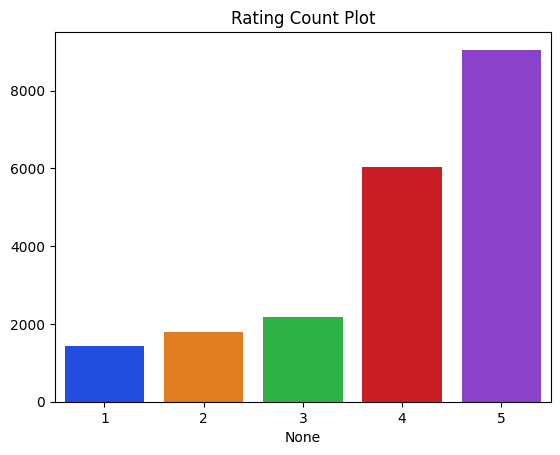

In [73]:
#Visualizing the unique values of ratings
rating_counts = data1['Rating'].value_counts()
colors = sns.color_palette('bright', n_colors=len(rating_counts))
sns.barplot(x=rating_counts.index, y=rating_counts.values,palette=colors)
plt.title('Count of Ratings')
plt.show()

Observation:

Based on the visual , it's evident that the count of ratings for scores 4 and 5 is notably higher compared to other rating scores. This suggests that the majority of users are highly content with their hotel experiences

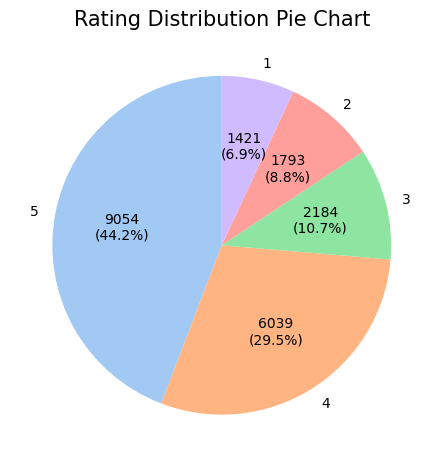

In [74]:
import matplotlib.pyplot as plt
rating_counts = data1['Rating'].value_counts()
colors = sns.color_palette('pastel')
plt.figure(figsize=(5.5,5.5))
plt.pie(rating_counts,  labels=rating_counts.index, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(rating_counts) / 100, p),
        colors=colors, startangle=90)

plt.title('Rating Distribution Pie Chart', size=15)
plt.show()

Observation:


Based on the above visual, it appears that approximately 75% of reviews receive ratings of 4 or 5, while the remaining 25% are rated 3 or lower. This indicates an unequal distribution of data, with fewer negative ratings provided by users. Consequently, our dataset is characterized by high imbalance

Text(0.5, 1.0, 'Word Frequency for all words')

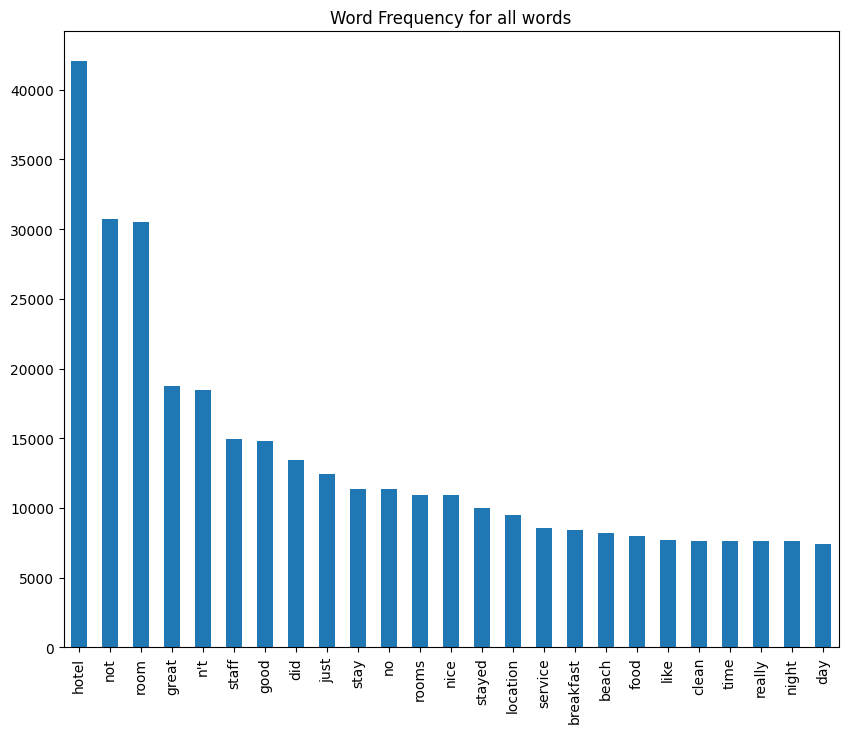

In [75]:
#visuvalization of most frequently used words
from nltk.probability import FreqDist
word_freq=pd.Series(''.join(data1['Review']).split()).value_counts()[:25]
word_freq.plot(kind='bar',figsize=(10,8))
plt.title('Word Frequency for all words')

Obesrvation:

According to the plot, the most commonly used words in the reviews include "hotel," "not," "room," "great," and "good."

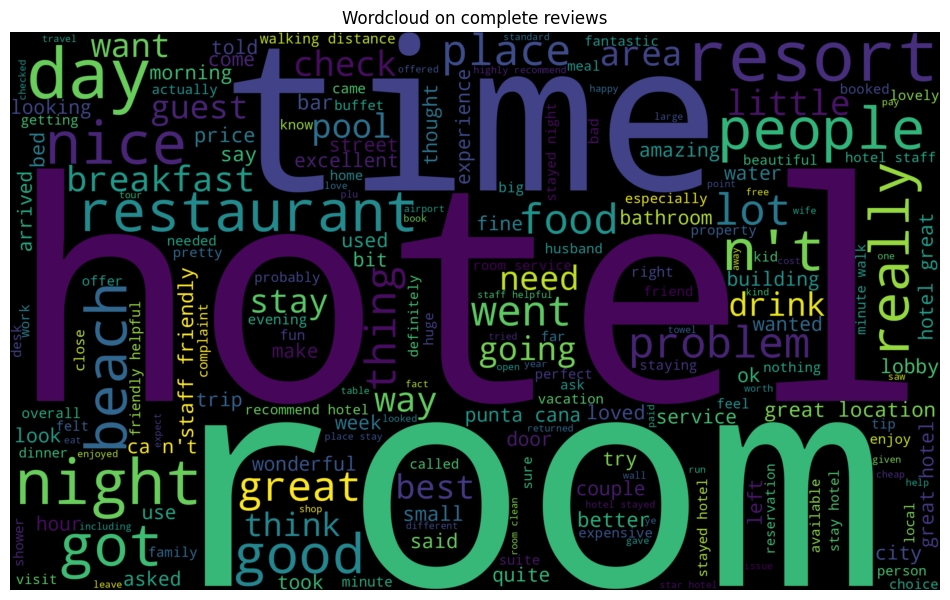

In [76]:
#word cloud of reviews
from wordcloud import WordCloud
string=" ".join(sen for sen in data1['Review'])
word_cloud=WordCloud(width=2500,height=1500).generate(string)
plt.figure(figsize=(12,9))
plt.imshow(word_cloud,interpolation='bilinear')
plt.title('Wordcloud on complete reviews')
plt.axis('off')
plt.show()

Obeservation:

The most commonly used words in over all review are "Hotel","Room","time","day","night"

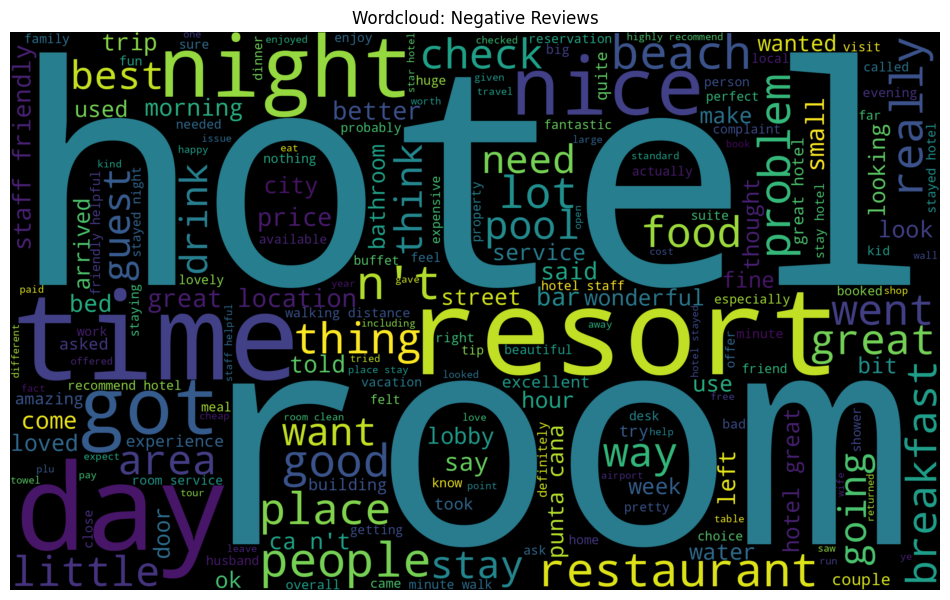

In [77]:
#World cloud of Negative rated Reviews
negative_reviews = " ".join([sen for sen in data1['Review'][data1['Rating']<=2]])
word_cloud=WordCloud(width=2500,height=1500).generate(string)
plt.figure(figsize=(12,9))
plt.imshow(word_cloud,interpolation='bilinear')
plt.title('Wordcloud of Negative Reviews')
plt.axis('off')
plt.show()

Observation:

The most oftenly used words who rated less are "Hotel","Room","Problem","Small","Week"

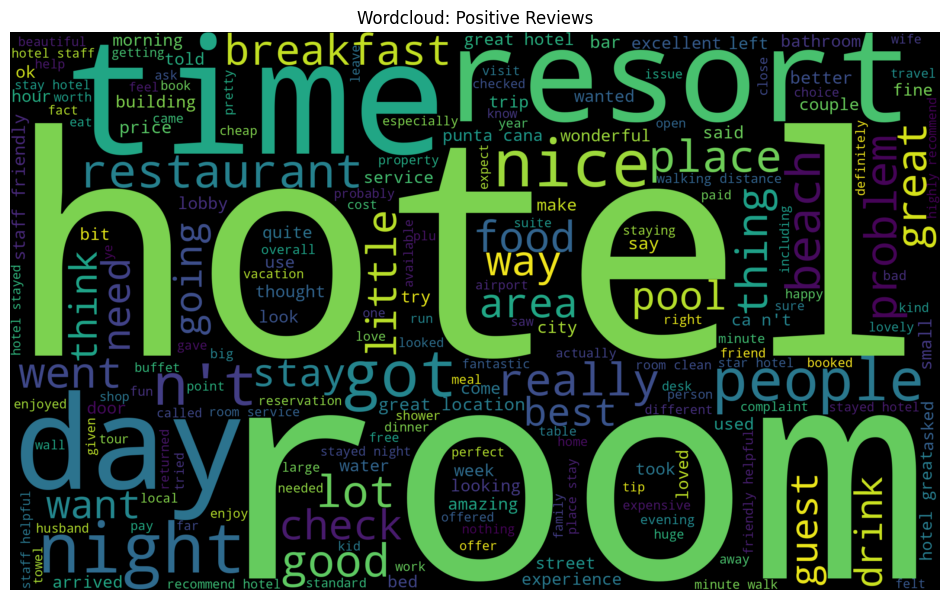

In [78]:
#Word cloud of positive Rated Reviews
positive_reviews=" ".join([sen for sen in data1['Review'][data1['Rating']>=3]])
word_cloud=WordCloud(width=2500,height=1500).generate(string)
plt.figure(figsize=(12,9))
plt.imshow(word_cloud,interpolation='bilinear')
plt.title('Wordcloud of Positive Reviews')
plt.axis('off')
plt.show()

Observation:

The most Regularly used words who rated high are "Hotel","Room","good","Nice","Great"


# **Text Preprocessing**




In [79]:
import nltk

In [80]:
#import regular expression to remove punchuvations
import re

In [81]:
#Word net lemmatizer for lemmatizing the words
from nltk.stem import WordNetLemmatizer
le=WordNetLemmatizer()

In [82]:
#Downloading stopwords and wordnet from nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [83]:
#Developing custom stopwords involves modifying existing stop words by altering a few words
default_stopwords = set(stopwords.words('english'))
custom_stopwords = default_stopwords.union({'n'}) - {'not'}

In [84]:
#Creating a function to eliminate punctuation, stopwords, and perform lemmatization
def preprocess_text(text):
  r=re.sub('[^a-zA-Z1-9]'," ", str(text))
  r=r.lower()
  r=r.split()
  r=[le.lemmatize(word) for word in r if word not in custom_stopwords]
  r=" ".join(r)
  return r

In [85]:
data=data1.copy()

In [86]:
#Dataset with the preprocessed text
data['preprocessed_text'] = data['Review'].apply(lambda x: preprocess_text(x))
data

,Review,Rating,preprocessed_text
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice room not 4 experience hotel monaco seattl...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,best kept secret 3rd time staying charm not 5 ...
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",2,ok look nice modern outside desk staff particu...
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruined vacation hotel opened sept ...


In [87]:
#importing SentimentintensityAnalyser for finding the sentiment score
from nltk.sentiment import SentimentIntensityAnalyzer

In [88]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [89]:
sia= SentimentIntensityAnalyzer()

In [137]:
#Applying the sentiment score for each review
data['sentiment_score'] = data['preprocessed_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [91]:
data["polarity"] = np.where(data["sentiment_score"] > 0, "positive", "negative")

In [92]:
data

,Review,Rating,preprocessed_text,sentiment_score,polarity
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,0.9747,positive
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,0.9876,positive
2,nice rooms not 4* experience hotel monaco seat...,3,nice room not 4 experience hotel monaco seattl...,0.9921,positive
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,0.9949,positive
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,0.9926,positive
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,best kept secret 3rd time staying charm not 5 ...,0.9810,positive
20487,great location price view hotel great quick pl...,4,great location price view hotel great quick pl...,0.9790,positive
20488,"ok just looks nice modern outside, desk staff ...",2,ok look nice modern outside desk staff particu...,0.8655,positive
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruined vacation hotel opened sept ...,0.9819,positive


In [93]:
#encoding the polarity feature to int
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["polarity"]=le.fit_transform(data["polarity"])

In [94]:
#Dividing into Dependent and Independent columns
X=data["preprocessed_text"]
Y=data["polarity"]

In [138]:
#splitting the data set for traing and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,random_state=21,shuffle=True,test_size=0.1,stratify=Y)

In [96]:
#Tf_idf vectorizer to convert text into vectors
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
xtrain=vectorizer.fit_transform(xtrain)

In [97]:
xtest=vectorizer.transform(xtest)

In [98]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=21)
model=dt.fit(xtrain,ytrain)

In [99]:
ypred=model.predict(xtest)

In [100]:
#Decision tree Evaluation
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
imbalance_acc=accuracy_score(ytest,ypred)
print("Accuracy:",imbalance_acc)
print("classification report of imbalaced data",classification_report(ytest,ypred))
print("confusion matrix:\n",confusion_matrix(ytest,ypred))
imbalnce_error=np.sqrt(np.mean((np.array(ytest)-np.array(ypred))**2))
print("error",imbalnce_error)

Accuracy: 0.9136585365853659
classification report of imbalaced data               precision    recall  f1-score   support

           0       0.33      0.27      0.29       138
           1       0.95      0.96      0.95      1912

    accuracy                           0.91      2050
   macro avg       0.64      0.61      0.62      2050
weighted avg       0.91      0.91      0.91      2050

confusion matrix:
 [[  37  101]
 [  76 1836]]
error 0.29383917950919025


In [101]:
x=vectorizer.fit_transform(X)
y=Y

In [102]:
#Balancing the data using RandomOversampler technique
print("Before underSampling, counts of label 'positive': {}".format(sum(y==1)))
print("Before underSampling, counts of label 'negative': {} \n".format(sum(y==0)))
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
x_undersampled, y_undersampled = rus.fit_resample(x, y)
print('After underSampling, the shape of train_X: {}'.format(x_undersampled.shape))
print('After underSampling, the shape of train_y: {} \n'.format(y_undersampled.shape))
print("After underSampling, counts of label 'positive': {}".format(sum(y_undersampled==1)))
print("After underSampling, counts of label 'negative': {}".format(sum(y_undersampled==0)))

Before underSampling, counts of label 'positive': 19112
Before underSampling, counts of label 'negative': 1379 

After underSampling, the shape of train_X: (2758, 46572)
After underSampling, the shape of train_y: (2758,) 

After underSampling, counts of label 'positive': 1379
After underSampling, counts of label 'negative': 1379


In [103]:
xtrain_un,xtest_un,ytrain_un,ytest_un=train_test_split(x_undersampled,y_undersampled,random_state=21,shuffle=True,test_size=0.1,stratify=y_undersampled)

In [104]:
#model Evaluation
model1=dt.fit(xtrain_un,ytrain_un)
ypred1=model1.predict(xtest_un)
ypredtr=model1.predict(xtrain_un)
print("Accuracy:",accuracy_score(ytest_un,ypred1))
print("classification report after undersampling :\n",classification_report(ytest_un,ypred1))
print("classification report after undersampling and training data:\n",classification_report(ytrain_un,ypredtr))
print("confusion matrix:\n",confusion_matrix(ytest_un,ypred1))

Accuracy: 0.7898550724637681
classification report after undersampling :
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       138
           1       0.78      0.80      0.79       138

    accuracy                           0.79       276
   macro avg       0.79      0.79      0.79       276
weighted avg       0.79      0.79      0.79       276

classification report after undersampling and training data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1241
           1       1.00      1.00      1.00      1241

    accuracy                           1.00      2482
   macro avg       1.00      1.00      1.00      2482
weighted avg       1.00      1.00      1.00      2482

confusion matrix:
 [[107  31]
 [ 27 111]]


In [105]:
#Balancing the data using Smoteoversampling method
print("Before overSampling, counts of label 'positive': {}".format(sum(y==1)))
print("Before overSampling, counts of label 'negative': {} \n".format(sum(y==0)))
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_oversampled, y_oversampled = smote.fit_resample(x, y)
print('After overSampling, the shape of train_X: {}'.format(x_oversampled.shape))
print('After overSampling, the shape of train_y: {} \n'.format(y_oversampled.shape))
print("After overSampling, counts of label 'positive': {}".format(sum(y_oversampled==1)))
print("After ovetSampling, counts of label 'negative': {}".format(sum(y_oversampled==0)))

Before overSampling, counts of label 'positive': 19112
Before overSampling, counts of label 'negative': 1379 

After overSampling, the shape of train_X: (38224, 46572)
After overSampling, the shape of train_y: (38224,) 

After overSampling, counts of label 'positive': 19112
After ovetSampling, counts of label 'negative': 19112


In [106]:
xtrain_ovr,xtest_ovr,ytrain_ovr,ytest_ovr=train_test_split(x_oversampled,y_oversampled,random_state=21,shuffle=True,test_size=0.1,stratify=y_oversampled)

In [107]:
#Model Evaluation
model2=dt.fit(xtrain_ovr,ytrain_ovr)
ypred2=model2.predict(xtest_ovr)
print("Accuracy:",accuracy_score(ytest_ovr,ypred2))
print(classification_report(ytest_ovr,ypred2))
print("confusion matrix:\n",confusion_matrix(ytest_ovr,ypred2))

Accuracy: 0.939576249019095
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1911
           1       0.96      0.91      0.94      1912

    accuracy                           0.94      3823
   macro avg       0.94      0.94      0.94      3823
weighted avg       0.94      0.94      0.94      3823

confusion matrix:
 [[1845   66]
 [ 165 1747]]


In [108]:
#Balancing the data Using ADASYN technique
print("Before overSampling, counts of label 'positive': {}".format(sum(y==1)))
print("Before overSampling, counts of label 'negative': {} \n".format(sum(y==0)))
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
x_balanced, y_balanced = adasyn.fit_resample(x,y)
print('After overSampling, the shape of train_X: {}'.format(x_balanced.shape))
print('After overSampling, the shape of train_y: {} \n'.format(y_balanced.shape))
print("After overSampling, counts of label 'positive': {}".format(sum(y_balanced==1)))
print("After ovetSampling, counts of label 'negative': {}".format(sum(y_balanced==0)))

Before overSampling, counts of label 'positive': 19112
Before overSampling, counts of label 'negative': 1379 

After overSampling, the shape of train_X: (38003, 46572)
After overSampling, the shape of train_y: (38003,) 

After overSampling, counts of label 'positive': 19112
After ovetSampling, counts of label 'negative': 18891


In [109]:
xtrain_bal,xtest_bal,ytrain_bal,ytest_bal=train_test_split(x_balanced,y_balanced,random_state=21,shuffle=True,test_size=0.1,stratify=y_balanced)

In [110]:
#Model Evaluation
model3=dt.fit(xtrain_bal,ytrain_bal)
ypred3=model3.predict(xtest_bal)
dt_accuracy=accuracy_score(ytest_bal,ypred3)
print("Accuracy:",dt_accuracy)
print(classification_report(ytest_bal,ypred3))
print("confusion matrix:\n",confusion_matrix(ytest_bal,ypred3))
dt_error=np.sqrt(np.mean((np.array(ytest_bal)-np.array(ypred3))**2))
print("error",dt_error)

Accuracy: 0.9318600368324125
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1889
           1       0.95      0.91      0.93      1912

    accuracy                           0.93      3801
   macro avg       0.93      0.93      0.93      3801
weighted avg       0.93      0.93      0.93      3801

confusion matrix:
 [[1794   95]
 [ 164 1748]]
error 0.26103632537941435


Observation:

After conducting all three balancing techniques, we determined that ADASYN sampling yielded the highest accuracy and demonstrated superior performance in balancing the dataset.

# **Model Bulding**

In [111]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg_model=lg.fit(xtrain_bal,ytrain_bal)
lg_pred=lg_model.predict(xtest_bal)
lg_accuracy=accuracy_score(ytest_bal,lg_pred)
print("Accuracy:",lg_accuracy)
print(classification_report(ytest_bal,lg_pred))
print("confusion matrix:\n",confusion_matrix(ytest_bal,lg_pred))
lg_error=np.sqrt(np.mean((np.array(ytest_bal)-np.array(lg_pred))**2))
print("error",lg_error)

Accuracy: 0.9647461194422521
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1889
           1       0.99      0.94      0.96      1912

    accuracy                           0.96      3801
   macro avg       0.97      0.96      0.96      3801
weighted avg       0.97      0.96      0.96      3801

confusion matrix:
 [[1870   19]
 [ 115 1797]]
error 0.18776016765477166


In [112]:
#Random forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=21)
rf_model=rf.fit(xtrain_bal,ytrain_bal)
rf_pred=rf_model.predict(xtest_bal)
rf_predtr=rf_model.predict(xtrain_bal)
rf_accuracy=accuracy_score(ytest_bal,rf_pred)
print("Accuracy of test:",rf_accuracy)
print("Accuracy of train:",accuracy_score(ytrain_bal,rf_predtr))
print(classification_report(ytest_bal,rf_pred))
print("confusion matrix:\n",confusion_matrix(ytest_bal,rf_pred))
rf_error=np.sqrt(np.mean((np.array(ytest_bal)-np.array(rf_pred)))**2)
print("error",rf_error)

Accuracy of test: 0.9844777690081558
Accuracy of train: 1.0
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1889
           1       0.99      0.98      0.98      1912

    accuracy                           0.98      3801
   macro avg       0.98      0.98      0.98      3801
weighted avg       0.98      0.98      0.98      3801

confusion matrix:
 [[1868   21]
 [  38 1874]]
error 0.0044725072349381745


In [113]:
# XGBoost Model
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(xtrain_bal, ytrain_bal)
y_pred_xgb = xgb.predict(xtest_bal)
y_pred_xgb_tr= xgb.predict(xtrain_bal)
xgb_tsacc=accuracy_score(ytest_bal, y_pred_xgb)
xgb_tracc=accuracy_score(ytrain_bal, y_pred_xgb_tr)
print('XGBoost Test Accuracy:', accuracy_score(ytest_bal, y_pred_xgb))
print('XGBoost Train Accuracy:', accuracy_score(ytrain_bal, y_pred_xgb_tr))
print("classification_report of xgboost model:\n",classification_report(ytest_bal, y_pred_xgb, labels=[0,1]))
xgb_error=np.sqrt(np.mean((np.array(ytest_bal)-np.array(y_pred_xgb))**2))
print("error",xgb_error)

XGBoost Test Accuracy: 0.9694817153380689
XGBoost Train Accuracy: 0.9948248640430384
classification_report of xgboost model:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1889
           1       0.97      0.97      0.97      1912

    accuracy                           0.97      3801
   macro avg       0.97      0.97      0.97      3801
weighted avg       0.97      0.97      0.97      3801

error 0.17469483295716295


In [114]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
X1= data["preprocessed_text"].values
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X1)

In [115]:
# Performing Tokenizer to convert all the text in to tokens and then into vectors
X1= tokenizer.texts_to_sequences(X1)
max_length = max([len(x1) for x1 in X1])
vocab_size = len(tokenizer.word_index)+1
print("Vocabulary size: {}".format(vocab_size))
print("max length of sentence: {}".format(max_length))

Vocabulary size: 46606
max length of sentence: 1916


In [116]:
#Appling padding on the vectors to maintain the same features for all text
from tensorflow.keras.preprocessing.sequence import pad_sequences
X1 = pad_sequences(X1, padding='post', maxlen=600)
Y1=y
X1,Y1= adasyn.fit_resample(X1,Y1)
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.1, random_state=21)

In [117]:
EPOCHS = 2
embedding_dim = 16
BATCH_SIZE = 125
units = 76
val_split = 0.12

In [118]:
X1.shape

(38459, 600)

In [119]:
#LSTM Model
from tensorflow.keras import layers as L
model = tf.keras.Sequential([
    L.Embedding(vocab_size, int(embedding_dim), input_length=X1.shape[1]),
    L.Bidirectional(L.LSTM(int(units),return_sequences=True)),
    L.Conv1D(64,3),
    L.MaxPool1D(),
    L.Flatten(),
    L.Dropout(0.2),
    L.Dense(128,activation="relu"),
    L.Dropout(0.2),
    L.Dense(64, activation="relu"),
    L.Dropout(0.2),
    L.Dense(5, activation="softmax") ])

In [120]:
#compiling the model with adam optimizer and sparsecxatogiricalcrossentropy loss function
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam',metrics=['accuracy'] )

In [121]:
model.fit(X_train, y_train, epochs=int(EPOCHS), validation_split=float(val_split), batch_size=int(BATCH_SIZE), verbose=2)

Epoch 1/2
244/244 - 506s - loss: 0.3852 - accuracy: 0.8173 - val_loss: 0.2444 - val_accuracy: 0.9085 - 506s/epoch - 2s/step
Epoch 2/2
244/244 - 552s - loss: 0.1744 - accuracy: 0.9396 - val_loss: 0.2254 - val_accuracy: 0.9177 - 552s/epoch - 2s/step


In [122]:
pred = model.predict(X_test)
ypred_lstm = np.argmax(pred,axis=-1)
ypred_lstm

121/121 [==============================] - 27s 212ms/step


array([0, 0, 0, ..., 0, 0, 1])

In [123]:
#LSTM Evaluation
LSTM_acc=accuracy_score(ypred_lstm,y_test)
print('LSTM Test Accuracy:',LSTM_acc )
print("classification_report of LSTM model:\n",classification_report(ypred_lstm,y_test, labels=[0,1]))
lstm_error=np.sqrt(np.mean((np.array(y_test)-np.array(ypred_lstm))**2))
print("error",lstm_error)

LSTM Test Accuracy: 0.9173166926677067
classification_report of LSTM model:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      1865
           1       0.94      0.90      0.92      1981

    accuracy                           0.92      3846
   macro avg       0.92      0.92      0.92      3846
weighted avg       0.92      0.92      0.92      3846

error 0.2875470523797684


In [136]:
#Data set of all models and accuracy
acc= {
    'Models': ["Decision Tree","Logistic Regression","Random Forest","XGBoost","LSTM","Decision Tree of imbalaced"],
    'Accuracy_score': [dt_accuracy,lg_accuracy, rf_accuracy,xgb_tsacc,LSTM_acc,imbalance_acc],
    'Errors': [dt_error,lg_error,rf_error,xgb_error,lstm_error,imbalnce_error]}
models_acc= pd.DataFrame(acc)
models_accuracy=models_acc.sort_values("Accuracy_score",ascending=False)
models_accuracy.reset_index(drop=True, inplace=True)
models_accuracy

,Models,Accuracy_score,Errors
0,Random Forest,0.984478,0.004473
1,XGBoost,0.969482,0.174695
2,Logistic Regression,0.964746,0.187760
3,Decision Tree,0.931860,0.261036
4,LSTM,0.917317,0.287547
5,Decision Tree of imbalaced,0.913659,0.293839
